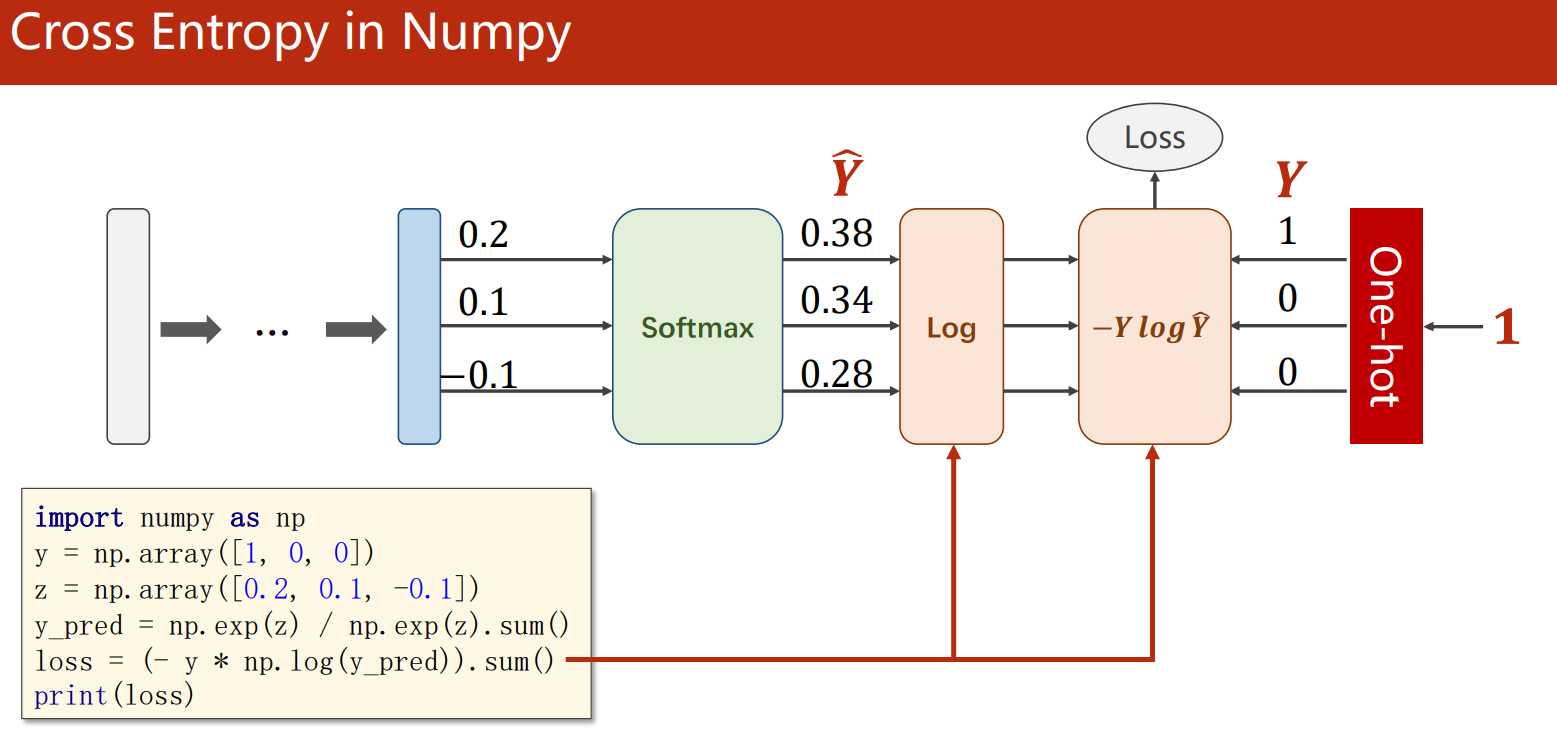

In [1]:
import numpy as np

In [2]:
y = np.array([1,0,0])
z = np.array([0.2,0.1,-0.1])

In [3]:
y

array([1, 0, 0])

In [4]:
z

array([ 0.2,  0.1, -0.1])

In [5]:
y_pred = np.exp(z) / np.exp(z).sum()

In [6]:
y_pred

array([0.37797814, 0.34200877, 0.28001309])

In [7]:
loss = (-y * np.log(y_pred)).sum()

In [8]:
loss

0.9729189131256584

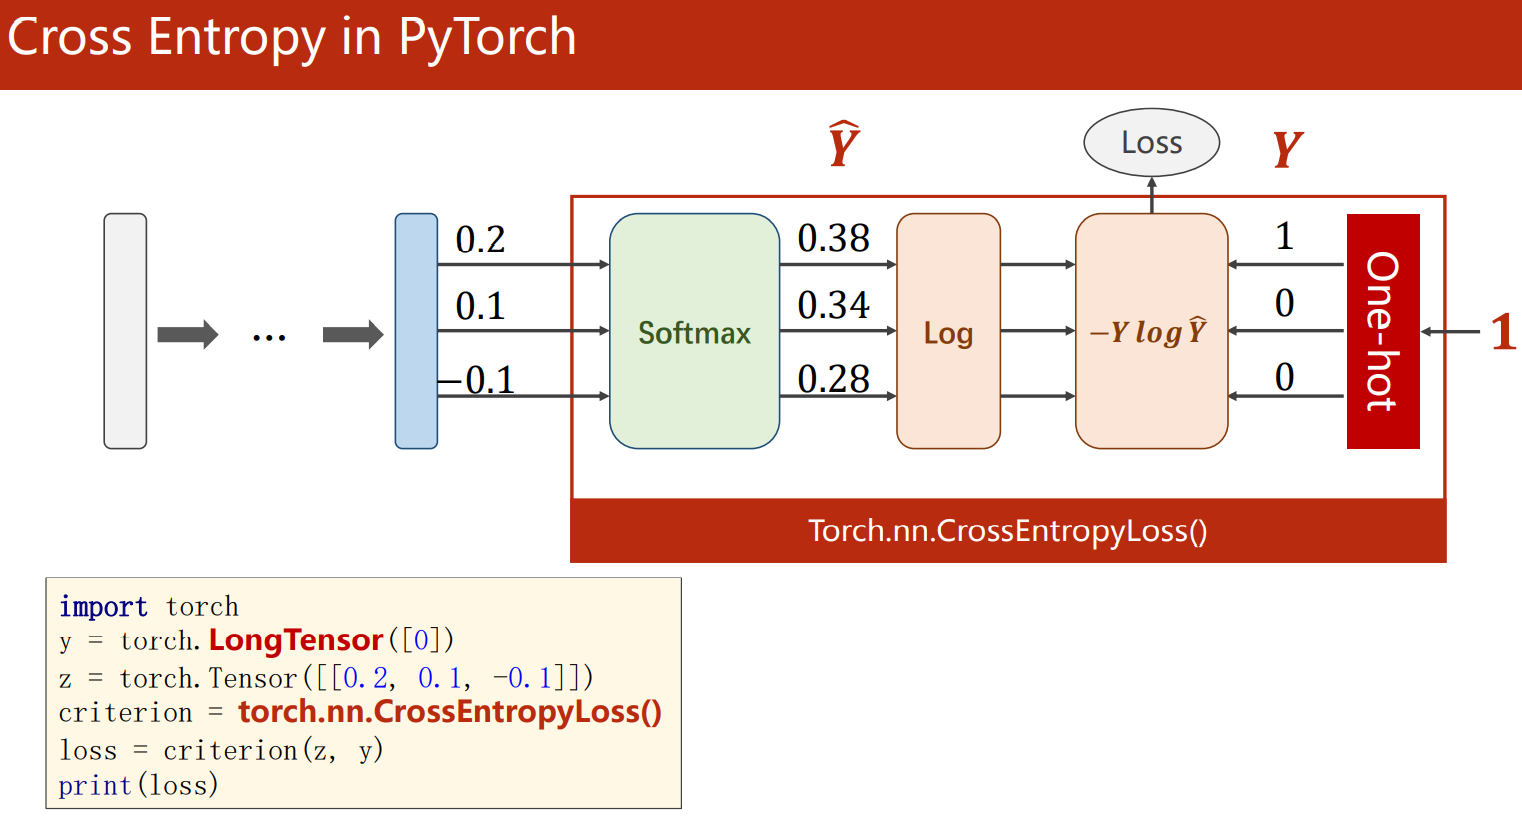

In [9]:
import torch

In [10]:
y = torch.LongTensor([0])

In [11]:
y

tensor([0])

In [14]:
z = torch.Tensor([[0.2,0.1,-0.1]])

In [15]:
z

tensor([[ 0.2000,  0.1000, -0.1000]])

In [16]:
criterion = torch.nn.CrossEntropyLoss()

In [17]:
loss = criterion(z,y)

In [18]:
loss

tensor(0.9729)

In [21]:
Y = torch.LongTensor([2,0,1])

In [22]:
Y

tensor([2, 0, 1])

In [23]:
Y_pred1 = torch.Tensor([[0.1, 0.2, 0.9],[1.1, 0.1, 0.2],[0.2, 2.1, 0.1]])

In [24]:
Y_pred1

tensor([[0.1000, 0.2000, 0.9000],
        [1.1000, 0.1000, 0.2000],
        [0.2000, 2.1000, 0.1000]])

In [25]:
Y_pred2 = torch.Tensor([[0.8,0.2,0.3],
                        [0.2,0.23,0.5],
                        [0.2,0.2,0.5]])

In [26]:
Y_pred2

tensor([[0.8000, 0.2000, 0.3000],
        [0.2000, 0.2300, 0.5000],
        [0.2000, 0.2000, 0.5000]])

In [27]:
loss1 = criterion(Y_pred1,Y)

In [28]:
loss1

tensor(0.4966)

In [29]:
loss2 = criterion(Y_pred2,Y)

In [30]:
loss2

tensor(1.2316)

In [31]:
from torchvision import transforms
from torchvision import datasets
from torch.utils.data import DataLoader
import torch.nn.functional as F
import torch.optim as optim

In [32]:
batch_size = 64

In [33]:
transform = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize((0.1307,),(0.3081,))
                               ])

In [34]:
transform

Compose(
    ToTensor()
    Normalize(mean=(0.1307,), std=(0.3081,))
)